# Task 1 : Data preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("D:\Data Science\Course 11\DS3_C1_S4_SuperstoreSales_Data_Challenge.csv", index_col='Order Date',parse_dates=True)
df

,Row ID,Order ID,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,11-11-2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,11-11-2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,731.9400,3,0.00,219.5820
2015-10-11,4,US-2015-108966,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,957.5775,5,0.45,-383.0310
2014-06-09,6,CA-2014-115812,6/14/2014,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,48.8600,7,0.00,14.1694
2014-06-09,11,CA-2014-115812,6/14/2014,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-19,9963,CA-2015-168088,3/22/2015,First Class,Home Office,United States,Houston,Texas,77041,Central,Furniture,383.4656,4,0.32,-67.6704
2016-12-05,9965,CA-2016-146374,12-10-2016,Second Class,Corporate,United States,Newark,Delaware,19711,East,Furniture,13.4000,1,0.00,6.4320
2015-09-06,9981,US-2015-151435,09-09-2015,Second Class,Consumer,United States,Lafayette,Louisiana,70506,South,Furniture,85.9800,1,0.00,22.3548


In [6]:
df=df[['Sales']]
df=df.sort_values(by='Order Date',ascending=True)
df

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,545.940
...,...
2017-12-29,258.750
2017-12-29,1207.840
2017-12-29,101.120


In [7]:
df_train = df[0:int(len(df)*0.8)]
df_train

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,545.940
...,...
2017-07-15,310.443
2017-07-15,664.146
2017-07-15,872.940


In [8]:
df_test = df[int(len(df)*0.8):]
df_test

,Sales
Order Date,
2017-07-17,39.080
2017-07-17,7.904
2017-07-17,1194.165
2017-07-18,198.744
2017-07-18,161.568
...,...
2017-12-29,258.750
2017-12-29,1207.840
2017-12-29,101.120


# check stationarity

In [11]:
from statsmodels.tsa.stattools import adfuller,acf,pacf

from statsmodels.tsa.statespace.tools import diff


In [12]:
def checkstationarity(data):
    pvalue=adfuller(data)[1]
    print(pvalue)
    if pvalue<0.05:
        msg='pvalue={}. Data is stationary, proceed to model building'.format(pvalue)
    else:
        msg='pvalue={} Data is not stationary, Make the data stationary before model building'.format(pvalue)
    
    return msg

In [13]:
checkstationarity(df_train)

0.0


'pvalue=0.0. Data is stationary, proceed to model building'

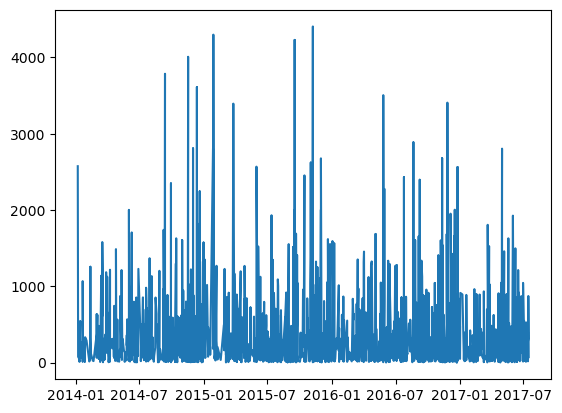

In [14]:
plt.plot(df_train)
plt.show()

# seasonal decompose

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
decomposition=seasonal_decompose(df_train,period=12)
decomposition

In [17]:
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

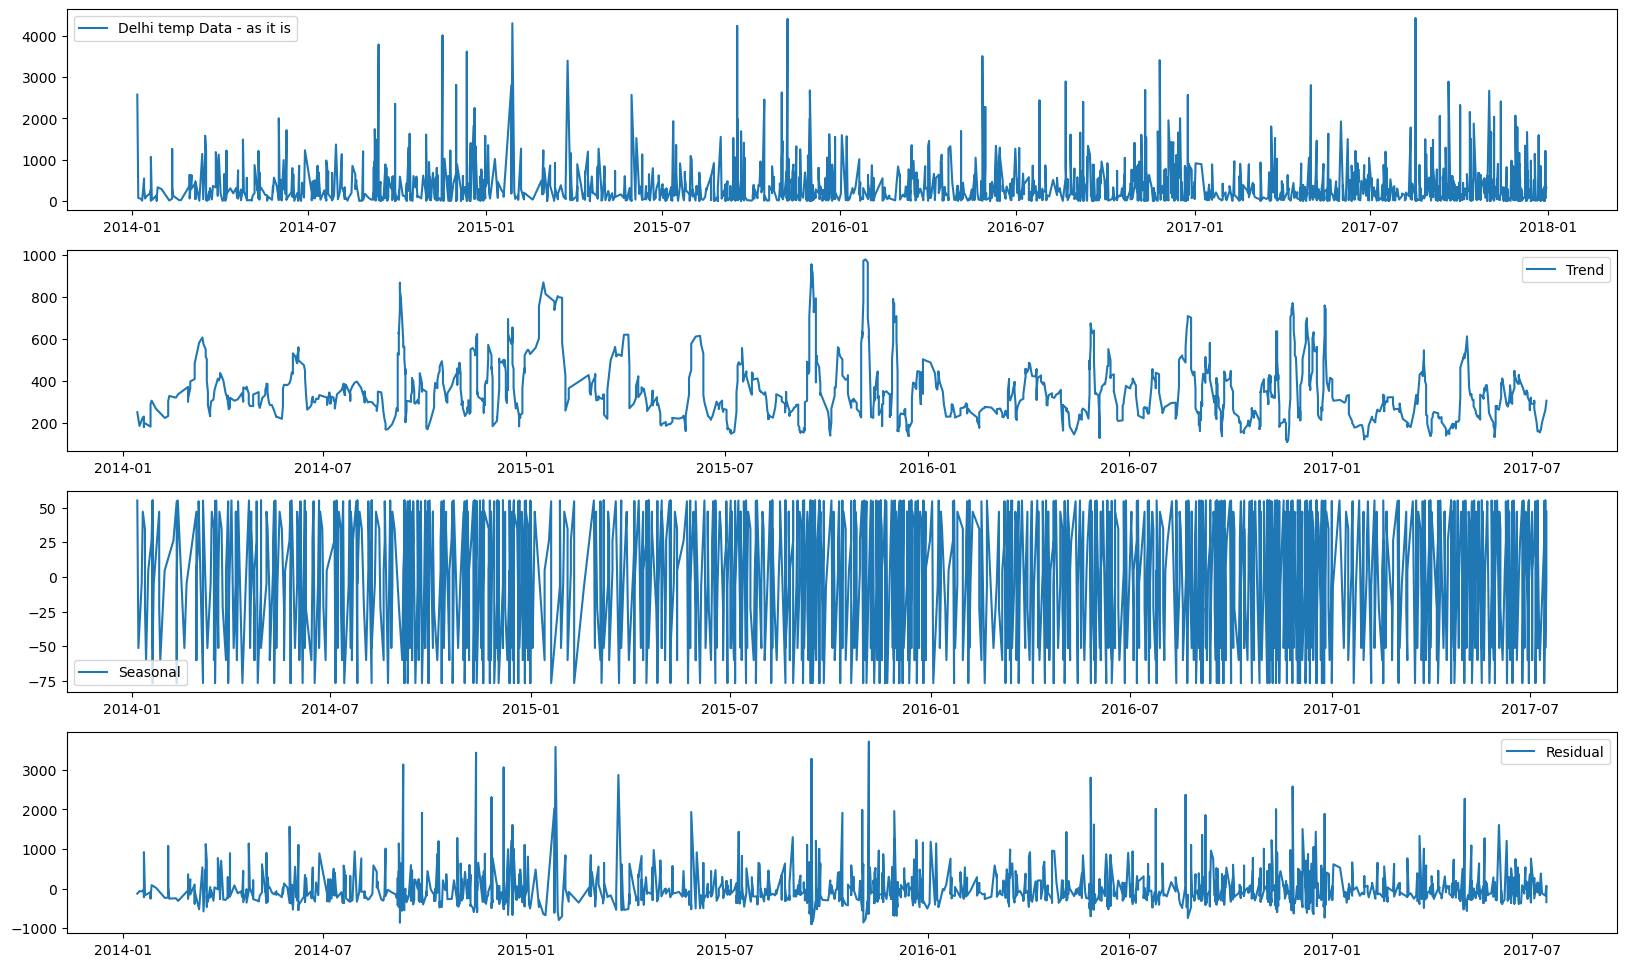

In [18]:
fig,ax=plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(df,label='Delhi temp Data - as it is')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

In [19]:
checkstationarity(df_train)

0.0


'pvalue=0.0. Data is stationary, proceed to model building'

# Plot ACF and PACF

In [36]:
from pmdarima.arima import auto_arima

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

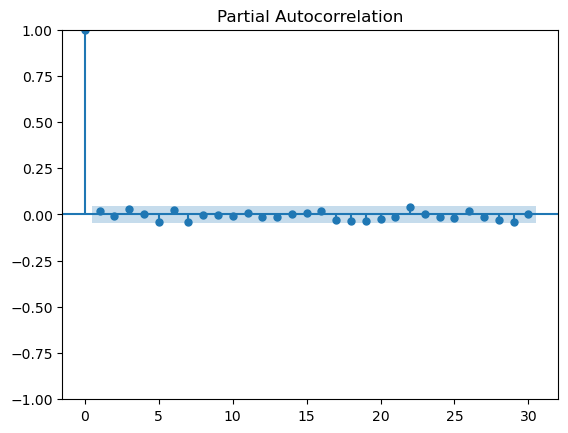

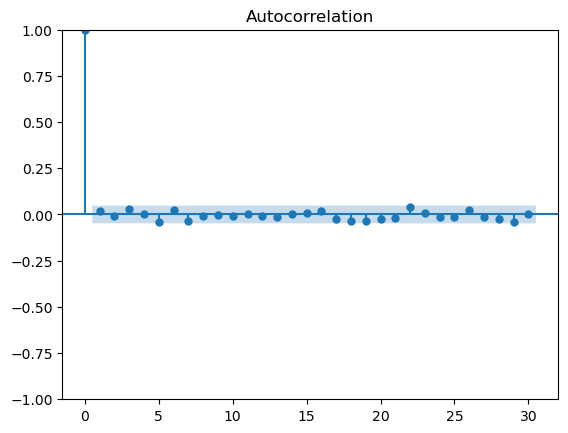

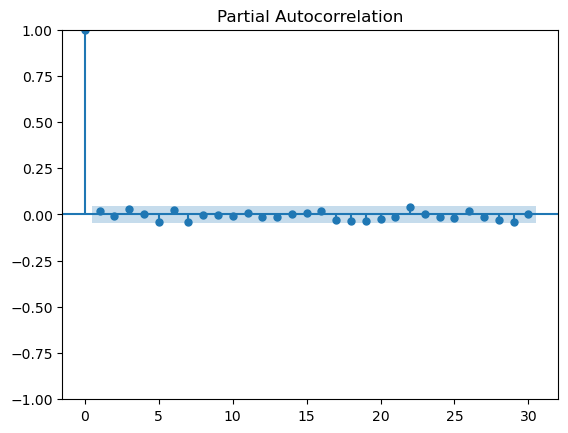

In [61]:
#plot_acf(df_train.dropna(),lags=20)
#plot_pacf(df_train.dropna(),lags=20)

plot_acf(df_train.dropna(),lags=30)
plot_pacf(df_train.dropna(),lags=30)

conider 

p=0,1

q=0,1

In [63]:
for p in range(0,3):
    ar_m = ARIMA(df_train,order=(p,0,0))
    r = ar_m.fit()
    print(r.summary())

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dat

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 1696
Model:                          ARIMA   Log Likelihood              -12962.909
Date:                Wed, 01 Mar 2023   AIC                          25929.818
Time:                        16:03:14   BIC                          25940.690
Sample:                             0   HQIC                         25933.844
                               - 1696                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        354.4457     20.086     17.647      0.000     315.078     393.813
sigma2      2.552e+05   4794.385     53.236      0.000    2.46e+05    2.65e+05
Ljung-Box (L1) (Q):                   0.70   Jarque-

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



p=0 -> AIC = 25929.818

p=1 -> AIC = 25931.209

p=2 -> AIC = 25933.089
So p = 0 as AIC is min

In [64]:
for q in range(0,3):
    ma_m = ARIMA(df_train,order=(0,0,q))
    m = ma_m.fit()
    print(m.summary())

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 1696
Model:                          ARIMA   Log Likelihood              -12962.909
Date:                Wed, 01 Mar 2023   AIC                          25929.818
Time:                        16:03:22   BIC                          25940.690
Sample:                             0   HQIC                         25933.844
                               - 1696                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        354.4457     20.086     17.647      0.000     315.078     393.813
sigma2      2.552e+05   4794.385     53.236      0.000    2.46e+05    2.65e+05
Ljung-Box (L1) (Q):                   0.70   Jarque-

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dat

In [ ]:

q=0 -> AIC = 25929.818

q=0 -> AIC = 25931.178

q=2 -> AIC = 25933.014

# Task : 3

## Build a ARIMA Model

In [67]:
model1 = ARIMA(df_train,order=(0,0,0))
r1 = model1.fit()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [68]:
r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                 1696
Model:                          ARIMA   Log Likelihood              -12962.909
Date:                Wed, 01 Mar 2023   AIC                          25929.818
Time:                        16:05:25   BIC                          25940.690
Sample:                             0   HQIC                         25933.844
                               - 1696                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        354.4457     20.086     17.647      0.000     315.078     393.813
sigma2      2.552e+05   4794.385     53.236      0.000    2.46e+05    2.65e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.70   Jarque-Bera (JB):             21140.49
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                             3.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
forecast=r1.forecast(len(df_test))
forecast

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1696    354.445658
1697    354.445658
1698    354.445658
1699    354.445658
1700    354.445658
           ...    
2116    354.445658
2117    354.445658
2118    354.445658
2119    354.445658
2120    354.445658
Name: predicted_mean, Length: 425, dtype: float64

# Task 4
## Build the SARIMA Model

In [70]:
p=1;d=0;q=1;
P=0;D=0;Q=0;
final_model = sm.tsa.statespace.SARIMAX(df_train,order=(p,d,q),seasonal_order=(P,D,Q,12)).fit()
final_model.summary()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                 1696
Model:               SARIMAX(1, 0, 1)   Log Likelihood              -12966.605
Date:                Wed, 01 Mar 2023   AIC                          25939.210
Time:                        16:05:39   BIC                          25955.518
Sample:                             0   HQIC                         25945.248
                               - 1696                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   1.44e-05   6.93e+04      0.000       1.000       1.000
ma.L1         -0.9980      0.003   -352.527      0.000      -1.004      -0.992
sigma2       2.55e+05   1.04e-09   2.46e+14      0.000    2.55e+05    2.55e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.58   Jarque-Bera (JB):             20737.01
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                             3.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.01e+28. Standard errors may be unstable.
"""

In [71]:
forecast=final_model.forecast(len(df_test))
forecast

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1696    334.784464
1697    334.782776
1698    334.781089
1699    334.779401
1700    334.777713
           ...    
2116    334.076361
2117    334.074677
2118    334.072993
2119    334.071309
2120    334.069625
Name: predicted_mean, Length: 425, dtype: float64

In [72]:
start = len(train)
end = len(train) + len(df_test) -1

print('start = {}, end = {}'.format(start,end))

predictions = final_model.predict(start,end)
print(predictions)

start = 184, end = 608
Order Date
2014-08-15    345.626658
2014-08-16    344.786774
2014-08-19    347.602262
2014-08-19    349.206777
2014-08-20    348.875841
                 ...    
2015-08-01    371.400016
2015-08-02    372.899892
2015-08-02    372.277635
2015-08-05    372.051431
2015-08-06    371.204490
Name: predicted_mean, Length: 425, dtype: float64


In [73]:
actual = []; pred=[]

for i in range (len(predictions)):
    actual.append(df_test["Sales"][i])
    pred.append(predictions[i])
    
df_res = pd.DataFrame({'actual' : actual, 'predicted': pred})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

       actual   predicted         err
0      39.080  345.626658 -306.546658
1       7.904  344.786774 -336.882774
2    1194.165  347.602262  846.562738
3     198.744  349.206777 -150.462777
4     161.568  348.875841 -187.307841
..        ...         ...         ...
420   258.750  371.400016 -112.650016
421  1207.840  372.899892  834.940108
422   101.120  372.277635 -271.157635
423   300.980  372.051431  -71.071431
424   323.136  371.204490  -48.068490

[425 rows x 3 columns]


In [74]:
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
print("\n\tMSE = {}\n\tRMSE = {}". format(mse1,np.sqrt(mse1)))


	MSE = 246810.17539148082
	RMSE = 496.79993497531865


<AxesSubplot:>

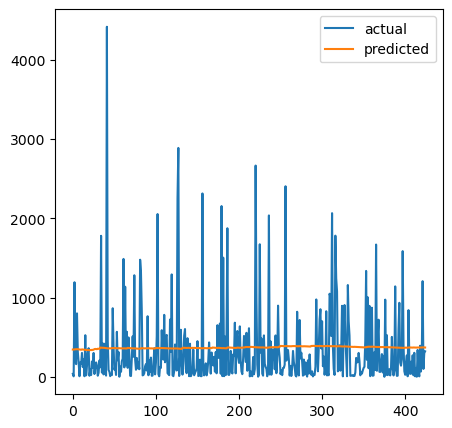

In [75]:
df_res.actual.plot(figsize = (5,5), legend = True)
df_res.predicted.plot(legend = True)
